# Single Ring

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import subprocess


In [22]:
def create_file_with_contents(file_path, contents):
    try:
        with open(file_path, 'w') as file:
            file.write(contents)
        print(f"File '{file_path}' created successfully with contents.")
    except Exception as e:
        print(f"Error: {e}")

In [4]:
for b in range(11):
    beta = b/10
    new_file_path = f'./zjob{beta}.sh'
    file_contents = f"""#!/bin/sh

#SBATCH -o output-%j.log
#SBATCH --time=72:00:00          # total run time limit (HH:MM:SS)
#SBATCH -c 40

python $F/ring.py . "worker_kwargs=[{{'circumference':250}}]" "n_workers=40" "n_rollouts_per_step=40" "warmup_steps=2000" "skip_stat_steps=5000" "horizon=5000" "global_reward=True" "n_steps=50" "alg='TRPO'" "use_critic=False" "gamma=0.9995" "beta={beta}"
"""

    create_file_with_contents(new_file_path, file_contents)
    for run in range(3):
        os.system(f'LLsub {new_file_path}')

File './zjob0.0.sh' created successfully with contents.
Submitted batch job 25351898
LLGrid: TXE1 (running slurm-wlm 23.02.7)
Submitted batch job 25351899
LLGrid: TXE1 (running slurm-wlm 23.02.7)
Submitted batch job 25351900
LLGrid: TXE1 (running slurm-wlm 23.02.7)
File './zjob0.1.sh' created successfully with contents.
Submitted batch job 25351901
LLGrid: TXE1 (running slurm-wlm 23.02.7)
Submitted batch job 25351903
LLGrid: TXE1 (running slurm-wlm 23.02.7)
Submitted batch job 25351904
LLGrid: TXE1 (running slurm-wlm 23.02.7)
File './zjob0.2.sh' created successfully with contents.
Submitted batch job 25351905
LLGrid: TXE1 (running slurm-wlm 23.02.7)
Submitted batch job 25351906
LLGrid: TXE1 (running slurm-wlm 23.02.7)
Submitted batch job 25351907
LLGrid: TXE1 (running slurm-wlm 23.02.7)
File './zjob0.3.sh' created successfully with contents.
Submitted batch job 25351908
LLGrid: TXE1 (running slurm-wlm 23.02.7)
Submitted batch job 25351909
LLGrid: TXE1 (running slurm-wlm 23.02.7)
Submit

In [23]:
files = {
      0 : [(25351898, 'gwwrydbv'), (25351899, 'cqaaqqlx'), (25351900, 'ydadevsy')],
    0.1 : [(25351901, 'npgyhrwr'), (25351903, 'azhlppad'), (25351904, 'ydpuhdgq')],
    0.2 : [(25351905, 'jusnunrk'), (25351906, 'dnsdbosa'), (25351907, 'jnjibibl')],
    0.3 : [(25351908, 'jornswor'), (25351909, 'hnqvmuqi'), (25351910, 'fhftugst')],
    0.4 : [(25351911, 'wrxxkydm'), (25351913, 'hyducava'), (25353699, 'ayrwuvsp')], # (25351912, '')
    0.5 : [(25351914, 'tcneldox'), (25351915, 'rjiyhika'), (25351916, 'ohbaaexe')],
    0.6 : [(25351917, 'ffwlpoqe'), (25351918, 'zqvggklk'), (25351919, 'vpqrmgaf')],
    0.7 : [(25351920, 'enjnqzkw'), (25351921, 'rwamadpg'), (25351922, 'xqenresq')],
    0.8 : [(25351923, 'bchnsvzk'), (25351924, 'yetrvnko'), (25351925, 'kfbhftbj')],
    0.9 : [(25351926, 'lbhiynnj'), (25351927, 'mtdihwqo'), (25351928, 'hqcpgysx')],
    1   : [(25351929, 'vknaujhf'), (25351930, 'ggpdhgyc'), (25351931, 'trxaycku')],
}

In [54]:

def ttc_mean_std(log_name):
    path = f'./{log_name}'
    means = []
    stds = []
    with open(path) as f:
        for line in f:
            if line[:5] == 'ttc m':
                num = float(line.split(' ')[-1])
                means += [num]
            elif line[:5] == 'ttc_s':
                num = float(line.split(' ')[-1])
                stds += [num]
    return np.array(means), np.array(stds)

def rl_speed_mean_std(dir_name):
    path = f'./tmp/{dir_name}/train_results.csv'
    df = pd.read_csv(path)
    return df['speed_rl'].to_numpy(), df['speed_rl_std'].to_numpy()

In [25]:
colors=['brown', 'red', 'orange', 'gold', 'lightgreen', 'forestgreen', 'paleturquoise', 'deepskyblue', 'blue', 'darkorchid', 'violet']

# plot reward graph
def speed_ttc_training_lists(runs):
    ttc_ys, ttc_es = [], []
    speed_ys, speed_es = [], []
    for i in range(len(runs)):
        run = runs[i]
        log, tmp_dir = f'output-{run[0]}.log', run[1]
        ttc_y, ttc_e = ttc_mean_std(log)
        ttc_ys += [ttc_y]
        ttc_es += [ttc_e]
        speed_y, speed_e = rl_speed_mean_std(tmp_dir)
        speed_ys += [speed_y]
        speed_es += [speed_e]
    return ttc_ys, speed_ys, ttc_es, speed_es

def speed_ttc_training_rewards(runs):
    ttc_ys, speed_ys, ttc_es, speed_es = speed_ttc_training_lists(runs)
    avg_ttc_y = np.mean(np.stack(ttc_ys), axis=0)
    avg_ttc_e = np.mean(np.stack(ttc_es), axis=0)
    avg_speed_y = np.mean(np.stack(speed_ys), axis=0)
    avg_speed_e = np.mean(np.stack(speed_es), axis=0)
    
    return avg_ttc_y, avg_speed_y, avg_ttc_e, avg_speed_e

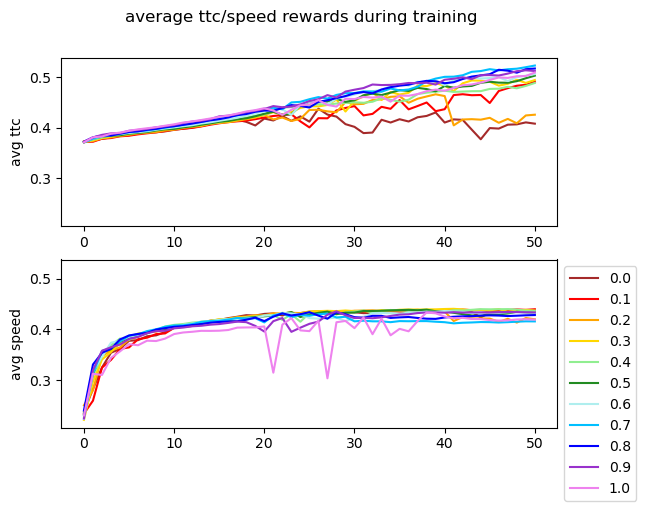

In [23]:
x = np.arange(51)
fig, axs = plt.subplots(2, sharey=True)

for b in range(11):
    beta = b/10
    if not beta in files.keys():
        continue
    avg_ttc_y, avg_speed_y, avg_ttc_e, avg_speed_e = speed_ttc_training_rewards(files[beta])
    
    axs[0].plot(x, avg_ttc_y/7, color=colors[b], label=f'{beta} ttc')
    axs[1].plot(x, avg_speed_y/10, color=colors[b], label=f'{beta}')
    
axs[0].set_ylabel('avg ttc')
axs[1].set_ylabel('avg speed')
plt.suptitle('average ttc/speed rewards during training')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [26]:
def get_tmpdir_from_log(path):
    with open(path) as f:
        for line in f:
            if line[:5] == 'res: ':
                splits = line.split('/')
                return splits[-1]
    

In [27]:
def make_train_script(source_beta, target_beta, tmpdir):    
    
    new_file_path = f'./zjob{source_beta}to{target_beta}run{tmpdir}.sh'
    file_contents = f"""#!/bin/sh

#SBATCH -o output-%j.log
#SBATCH --time=72:00:00          # total run time limit (HH:MM:SS)
#SBATCH -c 40

python $F/ring.py ./tmp/{tmpdir} "worker_kwargs=[{{'circumference':250}}]" "n_workers=40" "n_rollouts_per_step=40" "warmup_steps=2000" "skip_stat_steps=5000" "horizon=5000" "global_reward=True" "n_steps=75" "alg='TRPO'" "use_critic=False" "gamma=0.9995" "beta={target_beta}"
"""
    create_file_with_contents(new_file_path, file_contents)
    return new_file_path

In [8]:
# finetuning:
# prep: mkdir and stuff in base (turn original into new folder)


# then separately, run finetuning:
    # copy original 50 into new 0 in models folder for this finetuning run
    # make train script
    # submit job
    
# after job finishes:
    # rename models folder to prev fine tune beta folder
    
# then can do next finetuning on same base

# after all finetuning runs, can do evals for matrix

In [9]:
# prep finetuning
for s in range(b):
    source_beta = s/10
    tmpdir = files[source_beta][0][1]
    os.system(f'mkdir ./tmp/{tmpdir}/models/original && mv ./tmp/{tmpdir}/models/*.pth ./tmp/{tmpdir}/models/original') 
    # os.system(f'rm ./tmp/{tmpdir}/models/*.pth') 

NameError: name 'b' is not defined

In [10]:
def run_finetuning(source_beta, target_beta, tmpdir):
    os.system(f'cp ./tmp/{tmpdir}/models/original/model-50.pth ./tmp/{tmpdir}/models/model-0.pth')
    os.system(f'cp ./tmp/{tmpdir}/train_results_original.csv ./tmp/{tmpdir}/train_results.csv')
    new_job = make_train_script(source_beta, target_beta, tmpdir)
    output = subprocess.run(f'LLsub {new_job}', shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    first_line = output.stdout.split('\n')[0]
    job_no = first_line.split(' ')[-1]
    print(f'training source {source_beta, tmpdir}, target {target_beta}, job no. {job_no}')
    return job_no

def finetuning_per_target(target_beta):
    jobs = []
    for s in range(11):
        source_beta = s/10
        tmpdir = files[source_beta][0][1]
        jobs += [run_finetuning(source_beta, target_beta, tmpdir)]
    return jobs


In [66]:
ft_to_01 = finetuning_per_target(0.1)
print(ft_to_01)

File './zjob0.0to0.1rungwwrydbv.sh' created successfully with contents.
training source (0.0, 'gwwrydbv'), target 0.1, job no. 25370359
File './zjob0.1to0.1runnpgyhrwr.sh' created successfully with contents.
training source (0.1, 'npgyhrwr'), target 0.1, job no. 25370360
File './zjob0.2to0.1runjusnunrk.sh' created successfully with contents.
training source (0.2, 'jusnunrk'), target 0.1, job no. 25370361
File './zjob0.3to0.1runjornswor.sh' created successfully with contents.
training source (0.3, 'jornswor'), target 0.1, job no. 25370362
File './zjob0.4to0.1runwrxxkydm.sh' created successfully with contents.
training source (0.4, 'wrxxkydm'), target 0.1, job no. 25370363
File './zjob0.5to0.1runtcneldox.sh' created successfully with contents.
training source (0.5, 'tcneldox'), target 0.1, job no. 25370364
File './zjob0.6to0.1runffwlpoqe.sh' created successfully with contents.
training source (0.6, 'ffwlpoqe'), target 0.1, job no. 25370365
File './zjob0.7to0.1runenjnqzkw.sh' created succ

In [11]:
# make dirs and files and eval newly trained finetuning runs

def prep_eval(source_beta, target_beta, tmpdir):
    # os.system(f'mkdir ./tmp/{tmpdir}/trajectories ./tmp/{tmpdir}/evaluations')
    new_file_path = f'./tmp/{tmpdir}/eval{source_beta}to{target_beta}.sh'
    file_contents = f"""#!/bin/sh

#SBATCH -o output-%j.log
#SBATCH --time=72:00:00          # total run time limit (HH:MM:SS)

python $F/ring.py . "e=75" "warmup_steps=2000" "skip_stat_steps=5000" "horizon=1000" "circumference=250" "n_steps=10" "n_rollouts_per_step=1" "skip_vehicle_info_stat_steps=False" "full_rollout_only=True" "result_save=evaluations/test{target_beta}.csv" "vehicle_info_save=trajectories/test{target_beta}.npz" "save_agent=True"
"""
    create_file_with_contents(new_file_path, file_contents)
    return new_file_path

def eval_per_target(target_beta):
    jobs = []
    for s in range(11):
        source_beta = s/10
        tmpdir = files[source_beta][0][1]
        eval_script = prep_eval(source_beta, target_beta, tmpdir)
        
        output = subprocess.run(f'cd tmp/{tmpdir} && LLsub eval{source_beta}to{target_beta}.sh && cd -', shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        print(output.stdout)
        first_line = output.stdout.split('\n')[0]
        job_no = first_line.split(' ')[-1]
        jobs += [job_no]
    return jobs


In [26]:
eval_to_01 = eval_per_target(0.1)
print(eval_to_01)

File './tmp/gwwrydbv/eval0.0to0.1.sh' created successfully with contents.
Submitted batch job 25375028
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/npgyhrwr/eval0.1to0.1.sh' created successfully with contents.
Submitted batch job 25375029
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/jusnunrk/eval0.2to0.1.sh' created successfully with contents.
Submitted batch job 25375030
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/jornswor/eval0.3to0.1.sh' created successfully with contents.
Submitted batch job 25375031
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/wrxxkydm/eval0.4to0.1.sh' created successfully with contents.
Submitted batch job 25375032
LLGrid: TXE1 

In [28]:
eval_to_01 = [i for i in range(25375028, 25375039)]

In [12]:
# end step of current target_beta, prep for finetuning again

def on_finetuning_end(prev_target_beta):
    for s in range(11):
        source_beta = s/10
        tmpdir = files[source_beta][0][1]
        os.system(f'mkdir ./tmp/{tmpdir}/models/target{prev_target_beta} && mv ./tmp/{tmpdir}/models/*.pth ./tmp/{tmpdir}/models/target{prev_target_beta}') 
        # os.system(f'mv tmp/{tmpdir}/train_results.csv tmp/{tmpdir}/train_results_{target_beta}.csv')
        os.system(f'mv ./tmp/{tmpdir}/train_results.csv ./tmp/{tmpdir}/train_results_target_{prev_target_beta}.csv')
        print(f'{prev_target_beta} pth files moved, train_results renamed')

# rename train_results.csv, move previous finetuning runs to new dir, copy over og 50 

In [39]:
on_finetuning_end(0.1)

0.1 pth files moved, train_results renamed
0.1 pth files moved, train_results renamed
0.1 pth files moved, train_results renamed
0.1 pth files moved, train_results renamed
0.1 pth files moved, train_results renamed
0.1 pth files moved, train_results renamed
0.1 pth files moved, train_results renamed
0.1 pth files moved, train_results renamed
0.1 pth files moved, train_results renamed
0.1 pth files moved, train_results renamed
0.1 pth files moved, train_results renamed


mkdir: cannot create directory ‘./tmp/gwwrydbv/models/target0.1’: File exists
mkdir: cannot create directory ‘./tmp/npgyhrwr/models/target0.1’: File exists
mkdir: cannot create directory ‘./tmp/jusnunrk/models/target0.1’: File exists
mkdir: cannot create directory ‘./tmp/jornswor/models/target0.1’: File exists
mkdir: cannot create directory ‘./tmp/wrxxkydm/models/target0.1’: File exists
mkdir: cannot create directory ‘./tmp/tcneldox/models/target0.1’: File exists
mkdir: cannot create directory ‘./tmp/ffwlpoqe/models/target0.1’: File exists
mkdir: cannot create directory ‘./tmp/enjnqzkw/models/target0.1’: File exists
mkdir: cannot create directory ‘./tmp/bchnsvzk/models/target0.1’: File exists
mkdir: cannot create directory ‘./tmp/lbhiynnj/models/target0.1’: File exists
mkdir: cannot create directory ‘./tmp/vknaujhf/models/target0.1’: File exists


In [47]:

# for s in range(11):
#     source_beta = s/10
#     tmpdir = files[source_beta][0][1]
#     os.system(f'rm ./tmp/{tmpdir}/train_results.csv ./tmp/{tmpdir}/models/*.pth')

ft_to_02 = finetuning_per_target(0.2)
print(ft_to_02)

File './zjob0.0to0.2rungwwrydbv.sh' created successfully with contents.
training source (0.0, 'gwwrydbv'), target 0.2, job no. 25375754
File './zjob0.1to0.2runnpgyhrwr.sh' created successfully with contents.
training source (0.1, 'npgyhrwr'), target 0.2, job no. 25375755
File './zjob0.2to0.2runjusnunrk.sh' created successfully with contents.
training source (0.2, 'jusnunrk'), target 0.2, job no. 25375756
File './zjob0.3to0.2runjornswor.sh' created successfully with contents.
training source (0.3, 'jornswor'), target 0.2, job no. 25375757
File './zjob0.4to0.2runwrxxkydm.sh' created successfully with contents.
training source (0.4, 'wrxxkydm'), target 0.2, job no. 25375758
File './zjob0.5to0.2runtcneldox.sh' created successfully with contents.
training source (0.5, 'tcneldox'), target 0.2, job no. 25375759
File './zjob0.6to0.2runffwlpoqe.sh' created successfully with contents.
training source (0.6, 'ffwlpoqe'), target 0.2, job no. 25375760
File './zjob0.7to0.2runenjnqzkw.sh' created succ

In [49]:
eval_to_02 = eval_per_target(0.2)
print(eval_to_02)

File './tmp/gwwrydbv/eval0.0to0.2.sh' created successfully with contents.
Submitted batch job 25376462
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/npgyhrwr/eval0.1to0.2.sh' created successfully with contents.
Submitted batch job 25376463
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/jusnunrk/eval0.2to0.2.sh' created successfully with contents.
Submitted batch job 25376464
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/jornswor/eval0.3to0.2.sh' created successfully with contents.
Submitted batch job 25376465
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/wrxxkydm/eval0.4to0.2.sh' created successfully with contents.
Submitted batch job 25376466
LLGrid: TXE1 

In [50]:
on_finetuning_end(0.2)

0.2 pth files moved, train_results renamed
0.2 pth files moved, train_results renamed
0.2 pth files moved, train_results renamed
0.2 pth files moved, train_results renamed
0.2 pth files moved, train_results renamed
0.2 pth files moved, train_results renamed
0.2 pth files moved, train_results renamed
0.2 pth files moved, train_results renamed
0.2 pth files moved, train_results renamed
0.2 pth files moved, train_results renamed
0.2 pth files moved, train_results renamed


In [51]:
ft_to_03 = finetuning_per_target(0.3)
print(ft_to_03)

File './zjob0.0to0.3rungwwrydbv.sh' created successfully with contents.
training source (0.0, 'gwwrydbv'), target 0.3, job no. 25376724
File './zjob0.1to0.3runnpgyhrwr.sh' created successfully with contents.
training source (0.1, 'npgyhrwr'), target 0.3, job no. 25376725
File './zjob0.2to0.3runjusnunrk.sh' created successfully with contents.
training source (0.2, 'jusnunrk'), target 0.3, job no. 25376726
File './zjob0.3to0.3runjornswor.sh' created successfully with contents.
training source (0.3, 'jornswor'), target 0.3, job no. 25376727
File './zjob0.4to0.3runwrxxkydm.sh' created successfully with contents.
training source (0.4, 'wrxxkydm'), target 0.3, job no. 25376728
File './zjob0.5to0.3runtcneldox.sh' created successfully with contents.
training source (0.5, 'tcneldox'), target 0.3, job no. 25376729
File './zjob0.6to0.3runffwlpoqe.sh' created successfully with contents.
training source (0.6, 'ffwlpoqe'), target 0.3, job no. 25376730
File './zjob0.7to0.3runenjnqzkw.sh' created succ

In [53]:
eval_to_03 = eval_per_target(0.3)
print(eval_to_03)

File './tmp/gwwrydbv/eval0.0to0.3.sh' created successfully with contents.
Submitted batch job 25377097
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/npgyhrwr/eval0.1to0.3.sh' created successfully with contents.
Submitted batch job 25377098
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/jusnunrk/eval0.2to0.3.sh' created successfully with contents.
Submitted batch job 25377099
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/jornswor/eval0.3to0.3.sh' created successfully with contents.
Submitted batch job 25377100
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/wrxxkydm/eval0.4to0.3.sh' created successfully with contents.
Submitted batch job 25377101
LLGrid: TXE1 

In [54]:
on_finetuning_end(0.3)

0.3 pth files moved, train_results renamed
0.3 pth files moved, train_results renamed
0.3 pth files moved, train_results renamed
0.3 pth files moved, train_results renamed
0.3 pth files moved, train_results renamed
0.3 pth files moved, train_results renamed
0.3 pth files moved, train_results renamed
0.3 pth files moved, train_results renamed
0.3 pth files moved, train_results renamed
0.3 pth files moved, train_results renamed
0.3 pth files moved, train_results renamed


In [55]:
ft_to_04 = finetuning_per_target(0.4)
print(ft_to_04)

File './zjob0.0to0.4rungwwrydbv.sh' created successfully with contents.
training source (0.0, 'gwwrydbv'), target 0.4, job no. 25377145
File './zjob0.1to0.4runnpgyhrwr.sh' created successfully with contents.
training source (0.1, 'npgyhrwr'), target 0.4, job no. 25377146
File './zjob0.2to0.4runjusnunrk.sh' created successfully with contents.
training source (0.2, 'jusnunrk'), target 0.4, job no. 25377147
File './zjob0.3to0.4runjornswor.sh' created successfully with contents.
training source (0.3, 'jornswor'), target 0.4, job no. 25377148
File './zjob0.4to0.4runwrxxkydm.sh' created successfully with contents.
training source (0.4, 'wrxxkydm'), target 0.4, job no. 25377149
File './zjob0.5to0.4runtcneldox.sh' created successfully with contents.
training source (0.5, 'tcneldox'), target 0.4, job no. 25377150
File './zjob0.6to0.4runffwlpoqe.sh' created successfully with contents.
training source (0.6, 'ffwlpoqe'), target 0.4, job no. 25377151
File './zjob0.7to0.4runenjnqzkw.sh' created succ

In [56]:
eval_to_04 = eval_per_target(0.4)
print(eval_to_04)

File './tmp/gwwrydbv/eval0.0to0.4.sh' created successfully with contents.
Submitted batch job 25377584
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/npgyhrwr/eval0.1to0.4.sh' created successfully with contents.
Submitted batch job 25377586
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/jusnunrk/eval0.2to0.4.sh' created successfully with contents.
Submitted batch job 25377587
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/jornswor/eval0.3to0.4.sh' created successfully with contents.
Submitted batch job 25377588
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/wrxxkydm/eval0.4to0.4.sh' created successfully with contents.
Submitted batch job 25377589
LLGrid: TXE1 

In [57]:
on_finetuning_end(0.4)

0.4 pth files moved, train_results renamed
0.4 pth files moved, train_results renamed
0.4 pth files moved, train_results renamed
0.4 pth files moved, train_results renamed
0.4 pth files moved, train_results renamed
0.4 pth files moved, train_results renamed
0.4 pth files moved, train_results renamed
0.4 pth files moved, train_results renamed
0.4 pth files moved, train_results renamed
0.4 pth files moved, train_results renamed
0.4 pth files moved, train_results renamed


In [58]:
ft_to_05 = finetuning_per_target(0.5)
print(ft_to_05)

File './zjob0.0to0.5rungwwrydbv.sh' created successfully with contents.
training source (0.0, 'gwwrydbv'), target 0.5, job no. 25377869
File './zjob0.1to0.5runnpgyhrwr.sh' created successfully with contents.
training source (0.1, 'npgyhrwr'), target 0.5, job no. 25377870
File './zjob0.2to0.5runjusnunrk.sh' created successfully with contents.
training source (0.2, 'jusnunrk'), target 0.5, job no. 25377871
File './zjob0.3to0.5runjornswor.sh' created successfully with contents.
training source (0.3, 'jornswor'), target 0.5, job no. 25377874
File './zjob0.4to0.5runwrxxkydm.sh' created successfully with contents.
training source (0.4, 'wrxxkydm'), target 0.5, job no. 25377875
File './zjob0.5to0.5runtcneldox.sh' created successfully with contents.
training source (0.5, 'tcneldox'), target 0.5, job no. 25377876
File './zjob0.6to0.5runffwlpoqe.sh' created successfully with contents.
training source (0.6, 'ffwlpoqe'), target 0.5, job no. 25377877
File './zjob0.7to0.5runenjnqzkw.sh' created succ

In [59]:
eval_to_05 = eval_per_target(0.5)
print(eval_to_05)

File './tmp/gwwrydbv/eval0.0to0.5.sh' created successfully with contents.
Submitted batch job 25379060
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/npgyhrwr/eval0.1to0.5.sh' created successfully with contents.
Submitted batch job 25379061
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/jusnunrk/eval0.2to0.5.sh' created successfully with contents.
Submitted batch job 25379062
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/jornswor/eval0.3to0.5.sh' created successfully with contents.
Submitted batch job 25379063
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/wrxxkydm/eval0.4to0.5.sh' created successfully with contents.
Submitted batch job 25379064
LLGrid: TXE1 

In [60]:
on_finetuning_end(0.5)

0.5 pth files moved, train_results renamed
0.5 pth files moved, train_results renamed
0.5 pth files moved, train_results renamed
0.5 pth files moved, train_results renamed
0.5 pth files moved, train_results renamed
0.5 pth files moved, train_results renamed
0.5 pth files moved, train_results renamed
0.5 pth files moved, train_results renamed
0.5 pth files moved, train_results renamed
0.5 pth files moved, train_results renamed
0.5 pth files moved, train_results renamed


In [63]:
for s in range(11):
    source_beta = s/10
    tmpdir = files[source_beta][0][1]
    os.system(f'rm ./tmp/{tmpdir}/train_results.csv ./tmp/{tmpdir}/models/*.pth')

ft_to_06 = finetuning_per_target(0.6)
print(ft_to_06)

File './zjob0.0to0.6rungwwrydbv.sh' created successfully with contents.
training source (0.0, 'gwwrydbv'), target 0.6, job no. 25379219
File './zjob0.1to0.6runnpgyhrwr.sh' created successfully with contents.
training source (0.1, 'npgyhrwr'), target 0.6, job no. 25379220
File './zjob0.2to0.6runjusnunrk.sh' created successfully with contents.
training source (0.2, 'jusnunrk'), target 0.6, job no. 25379221
File './zjob0.3to0.6runjornswor.sh' created successfully with contents.
training source (0.3, 'jornswor'), target 0.6, job no. 25379222
File './zjob0.4to0.6runwrxxkydm.sh' created successfully with contents.
training source (0.4, 'wrxxkydm'), target 0.6, job no. 25379223
File './zjob0.5to0.6runtcneldox.sh' created successfully with contents.
training source (0.5, 'tcneldox'), target 0.6, job no. 25379224
File './zjob0.6to0.6runffwlpoqe.sh' created successfully with contents.
training source (0.6, 'ffwlpoqe'), target 0.6, job no. 25379226
File './zjob0.7to0.6runenjnqzkw.sh' created succ

In [74]:
eval_to_06 = eval_per_target(0.6)
print(eval_to_06)

File './tmp/gwwrydbv/eval0.0to0.6.sh' created successfully with contents.
Submitted batch job 25379840
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/npgyhrwr/eval0.1to0.6.sh' created successfully with contents.
Submitted batch job 25379841
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/jusnunrk/eval0.2to0.6.sh' created successfully with contents.
Submitted batch job 25379842
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/jornswor/eval0.3to0.6.sh' created successfully with contents.
Submitted batch job 25379843
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/wrxxkydm/eval0.4to0.6.sh' created successfully with contents.
Submitted batch job 25379844
LLGrid: TXE1 

In [75]:
on_finetuning_end(0.6)

0.6 pth files moved, train_results renamed
0.6 pth files moved, train_results renamed
0.6 pth files moved, train_results renamed
0.6 pth files moved, train_results renamed
0.6 pth files moved, train_results renamed
0.6 pth files moved, train_results renamed
0.6 pth files moved, train_results renamed
0.6 pth files moved, train_results renamed
0.6 pth files moved, train_results renamed
0.6 pth files moved, train_results renamed
0.6 pth files moved, train_results renamed


In [76]:
ft_to_07 = finetuning_per_target(0.7)
print(ft_to_07)

File './zjob0.0to0.7rungwwrydbv.sh' created successfully with contents.
training source (0.0, 'gwwrydbv'), target 0.7, job no. 25380105
File './zjob0.1to0.7runnpgyhrwr.sh' created successfully with contents.
training source (0.1, 'npgyhrwr'), target 0.7, job no. 25380106
File './zjob0.2to0.7runjusnunrk.sh' created successfully with contents.
training source (0.2, 'jusnunrk'), target 0.7, job no. 25380108
File './zjob0.3to0.7runjornswor.sh' created successfully with contents.
training source (0.3, 'jornswor'), target 0.7, job no. 25380109
File './zjob0.4to0.7runwrxxkydm.sh' created successfully with contents.
training source (0.4, 'wrxxkydm'), target 0.7, job no. 25380110
File './zjob0.5to0.7runtcneldox.sh' created successfully with contents.
training source (0.5, 'tcneldox'), target 0.7, job no. 25380111
File './zjob0.6to0.7runffwlpoqe.sh' created successfully with contents.
training source (0.6, 'ffwlpoqe'), target 0.7, job no. 25380112
File './zjob0.7to0.7runenjnqzkw.sh' created succ

In [77]:
eval_to_07 = eval_per_target(0.7)
print(eval_to_07)

File './tmp/gwwrydbv/eval0.0to0.7.sh' created successfully with contents.
Submitted batch job 25380247
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/npgyhrwr/eval0.1to0.7.sh' created successfully with contents.
Submitted batch job 25380248
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/jusnunrk/eval0.2to0.7.sh' created successfully with contents.
Submitted batch job 25380249
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/jornswor/eval0.3to0.7.sh' created successfully with contents.
Submitted batch job 25380250
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/wrxxkydm/eval0.4to0.7.sh' created successfully with contents.
Submitted batch job 25380251
LLGrid: TXE1 

In [78]:
on_finetuning_end(0.7)

0.7 pth files moved, train_results renamed
0.7 pth files moved, train_results renamed
0.7 pth files moved, train_results renamed
0.7 pth files moved, train_results renamed
0.7 pth files moved, train_results renamed
0.7 pth files moved, train_results renamed
0.7 pth files moved, train_results renamed
0.7 pth files moved, train_results renamed
0.7 pth files moved, train_results renamed
0.7 pth files moved, train_results renamed
0.7 pth files moved, train_results renamed


In [80]:
for s in range(11):
    source_beta = s/10
    tmpdir = files[source_beta][0][1]
    os.system(f'rm ./tmp/{tmpdir}/train_results.csv ./tmp/{tmpdir}/models/*.pth')

ft_to_08 = finetuning_per_target(0.8)
print(ft_to_08)

#0.8 to 0.8 failed

File './zjob0.0to0.8rungwwrydbv.sh' created successfully with contents.
training source (0.0, 'gwwrydbv'), target 0.8, job no. 25380563
File './zjob0.1to0.8runnpgyhrwr.sh' created successfully with contents.
training source (0.1, 'npgyhrwr'), target 0.8, job no. 25380564
File './zjob0.2to0.8runjusnunrk.sh' created successfully with contents.
training source (0.2, 'jusnunrk'), target 0.8, job no. 25380565
File './zjob0.3to0.8runjornswor.sh' created successfully with contents.
training source (0.3, 'jornswor'), target 0.8, job no. 25380566
File './zjob0.4to0.8runwrxxkydm.sh' created successfully with contents.
training source (0.4, 'wrxxkydm'), target 0.8, job no. 25380567
File './zjob0.5to0.8runtcneldox.sh' created successfully with contents.
training source (0.5, 'tcneldox'), target 0.8, job no. 25380568
File './zjob0.6to0.8runffwlpoqe.sh' created successfully with contents.
training source (0.6, 'ffwlpoqe'), target 0.8, job no. 25380569
File './zjob0.7to0.8runenjnqzkw.sh' created succ

In [81]:
eval_to_08 = eval_per_target(0.8)
print(eval_to_08)
# 0.8 to 0.8 failed training

File './tmp/gwwrydbv/eval0.0to0.8.sh' created successfully with contents.
Submitted batch job 25380853
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/npgyhrwr/eval0.1to0.8.sh' created successfully with contents.
Submitted batch job 25380854
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/jusnunrk/eval0.2to0.8.sh' created successfully with contents.
Submitted batch job 25380856
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/jornswor/eval0.3to0.8.sh' created successfully with contents.
Submitted batch job 25380857
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/wrxxkydm/eval0.4to0.8.sh' created successfully with contents.
Submitted batch job 25380858
LLGrid: TXE1 

In [82]:
on_finetuning_end(0.8)

0.8 pth files moved, train_results renamed
0.8 pth files moved, train_results renamed
0.8 pth files moved, train_results renamed
0.8 pth files moved, train_results renamed
0.8 pth files moved, train_results renamed
0.8 pth files moved, train_results renamed
0.8 pth files moved, train_results renamed
0.8 pth files moved, train_results renamed
0.8 pth files moved, train_results renamed
0.8 pth files moved, train_results renamed
0.8 pth files moved, train_results renamed


In [83]:
ft_to_09 = finetuning_per_target(0.9)
print(ft_to_09)

File './zjob0.0to0.9rungwwrydbv.sh' created successfully with contents.
training source (0.0, 'gwwrydbv'), target 0.9, job no. 25380891
File './zjob0.1to0.9runnpgyhrwr.sh' created successfully with contents.
training source (0.1, 'npgyhrwr'), target 0.9, job no. 25380892
File './zjob0.2to0.9runjusnunrk.sh' created successfully with contents.
training source (0.2, 'jusnunrk'), target 0.9, job no. 25380893
File './zjob0.3to0.9runjornswor.sh' created successfully with contents.
training source (0.3, 'jornswor'), target 0.9, job no. 25380894
File './zjob0.4to0.9runwrxxkydm.sh' created successfully with contents.
training source (0.4, 'wrxxkydm'), target 0.9, job no. 25380895
File './zjob0.5to0.9runtcneldox.sh' created successfully with contents.
training source (0.5, 'tcneldox'), target 0.9, job no. 25380896
File './zjob0.6to0.9runffwlpoqe.sh' created successfully with contents.
training source (0.6, 'ffwlpoqe'), target 0.9, job no. 25380897
File './zjob0.7to0.9runenjnqzkw.sh' created succ

In [11]:
eval_to_09 = eval_per_target(0.9)
print(eval_to_09)

File './tmp/gwwrydbv/eval0.0to0.9.sh' created successfully with contents.
Submitted batch job 25381181
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/npgyhrwr/eval0.1to0.9.sh' created successfully with contents.
Submitted batch job 25381182
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/jusnunrk/eval0.2to0.9.sh' created successfully with contents.
Submitted batch job 25381183
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/jornswor/eval0.3to0.9.sh' created successfully with contents.
Submitted batch job 25381184
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/wrxxkydm/eval0.4to0.9.sh' created successfully with contents.
Submitted batch job 25381185
LLGrid: TXE1 

In [14]:
on_finetuning_end(0.9)

0.9 pth files moved, train_results renamed
0.9 pth files moved, train_results renamed
0.9 pth files moved, train_results renamed
0.9 pth files moved, train_results renamed
0.9 pth files moved, train_results renamed
0.9 pth files moved, train_results renamed
0.9 pth files moved, train_results renamed
0.9 pth files moved, train_results renamed
0.9 pth files moved, train_results renamed
0.9 pth files moved, train_results renamed
0.9 pth files moved, train_results renamed


In [17]:
for s in range(11):
    source_beta = s/10
    tmpdir = files[source_beta][0][1]
    os.system(f'rm ./tmp/{tmpdir}/train_results.csv ./tmp/{tmpdir}/models/*.pth')

ft_to_10 = finetuning_per_target(1.0)
print(ft_to_10)

File './zjob0.0to1.0rungwwrydbv.sh' created successfully with contents.
training source (0.0, 'gwwrydbv'), target 1.0, job no. 25381305
File './zjob0.1to1.0runnpgyhrwr.sh' created successfully with contents.
training source (0.1, 'npgyhrwr'), target 1.0, job no. 25381306
File './zjob0.2to1.0runjusnunrk.sh' created successfully with contents.
training source (0.2, 'jusnunrk'), target 1.0, job no. 25381307
File './zjob0.3to1.0runjornswor.sh' created successfully with contents.
training source (0.3, 'jornswor'), target 1.0, job no. 25381308
File './zjob0.4to1.0runwrxxkydm.sh' created successfully with contents.
training source (0.4, 'wrxxkydm'), target 1.0, job no. 25381309
File './zjob0.5to1.0runtcneldox.sh' created successfully with contents.
training source (0.5, 'tcneldox'), target 1.0, job no. 25381310
File './zjob0.6to1.0runffwlpoqe.sh' created successfully with contents.
training source (0.6, 'ffwlpoqe'), target 1.0, job no. 25381311
File './zjob0.7to1.0runenjnqzkw.sh' created succ

In [13]:
eval_to_10 = eval_per_target(1.0)
print(eval_to_10)

File './tmp/gwwrydbv/eval0.0to1.0.sh' created successfully with contents.
Submitted batch job 25386801
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/npgyhrwr/eval0.1to1.0.sh' created successfully with contents.
Submitted batch job 25386802
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/jusnunrk/eval0.2to1.0.sh' created successfully with contents.
Submitted batch job 25386803
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/jornswor/eval0.3to1.0.sh' created successfully with contents.
Submitted batch job 25386804
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/wrxxkydm/eval0.4to1.0.sh' created successfully with contents.
Submitted batch job 25386805
LLGrid: TXE1 

In [15]:
on_finetuning_end(1.0)

1.0 pth files moved, train_results renamed
1.0 pth files moved, train_results renamed
1.0 pth files moved, train_results renamed
1.0 pth files moved, train_results renamed
1.0 pth files moved, train_results renamed
1.0 pth files moved, train_results renamed
1.0 pth files moved, train_results renamed
1.0 pth files moved, train_results renamed
1.0 pth files moved, train_results renamed
1.0 pth files moved, train_results renamed
1.0 pth files moved, train_results renamed


In [16]:
def prep_eval(source_beta, target_beta, tmpdir):
    # os.system(f'mkdir ./tmp/{tmpdir}/trajectories ./tmp/{tmpdir}/evaluations')
    new_file_path = f'./tmp/{tmpdir}/models/target{target_beta}/eval{source_beta}to{target_beta}.sh'
    
    # need to move *.pth in models/target{target_beta} to new dir models, and make trajectories and evaluations dirs
    os.system(f'mkdir ./tmp/{tmpdir}/models/target{target_beta}/models ./tmp/{tmpdir}/models/target{target_beta}/evaluations ./tmp/{tmpdir}/models/target{target_beta}/trajectories')
    os.system(f'mv ./tmp/{tmpdir}/models/target{target_beta}/*.pth ./tmp/{tmpdir}/models/target{target_beta}/models')
    file_contents = f"""#!/bin/sh

#SBATCH -o output-%j.log
#SBATCH --time=72:00:00          # total run time limit (HH:MM:SS)

python $F/ring.py models/target{target_beta} "e=75" "warmup_steps=2000" "skip_stat_steps=5000" "horizon=1000" "circumference=250" "n_steps=10" "n_rollouts_per_step=1" "skip_vehicle_info_stat_steps=False" "full_rollout_only=True" "result_save=evaluations/test{target_beta}.csv" "vehicle_info_save=trajectories/test{target_beta}.npz" "save_agent=True"
"""
    create_file_with_contents(new_file_path, file_contents)
    return new_file_path

def eval_per_target(target_beta):
    for s in range(11):
        source_beta = s/10
        tmpdir = files[source_beta][0][1]
        eval_script = prep_eval(source_beta, target_beta, tmpdir)
        
        # change the LLsub eval path
        output = subprocess.run(f'cd tmp/{tmpdir}/models/target{target_beta} && LLsub eval{source_beta}to{target_beta}.sh && cd -', shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        print(output.stdout)
        
for t in range(1, 11):
    target_beta = t/10
    eval_per_target(target_beta)

File './tmp/gwwrydbv/models/target0.1/eval0.0to0.1.sh' created successfully with contents.
Submitted batch job 25386892
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/npgyhrwr/models/target0.1/eval0.1to0.1.sh' created successfully with contents.
Submitted batch job 25386893
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/jusnunrk/models/target0.1/eval0.2to0.1.sh' created successfully with contents.
Submitted batch job 25386894
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/jornswor/models/target0.1/eval0.3to0.1.sh' created successfully with contents.
Submitted batch job 25386895
LLGrid: TXE1 (running slurm-wlm 23.02.7)
/home/gridsan/jding/automatic_vehicular_control/automatic_vehicular_control

File './tmp/wrxxkydm/models/target0.1/eval0.4to0

In [25]:
# make total reward matrix

# (source, target)

# get eval reward means
transfer_matrix = [ ]
for s in range(11):
    row = []
    source_beta = s/10
    tmpdir = files[source_beta][0][1]
    for t in range(1, 10):
        target_beta = t/10
        file_name = f'./tmp/{tmpdir}/evaluations/test{target_beta}.csv'
        df = pd.read_csv(file_name)
        reward = np.mean(df['reward_mean'].to_numpy())
        row += [reward]
    transfer_matrix += [row]
    
transfer_matrix = np.array(transfer_matrix)
print(transfer_matrix.shape)
argmax = np.argmax(transfer_matrix, axis=1)
print(argmax/10)
        
    

(11, 9)
[0.8 0.4 0.2 0.2 0.2 0.7 0.2 0.2 0.2 0.7 0.2]


In [29]:
# plotting finetuning pareto

def ttc_mean_std(log_name):
    path = f'./{log_name}'
    means = []
    stds = []
    with open(path) as f:
        for line in f:
            if line[:5] == 'ttc m':
                num = float(line.split(' ')[-1])
                means += [num]
            elif line[:5] == 'ttc_s':
                num = float(line.split(' ')[-1])
                stds += [num]
    return np.mean(np.array(means))

def rl_speed_mean_std(dir_name, target_beta):
    path = f'./tmp/{dir_name}/evaluations/test{target_beta}.csv'
    df = pd.read_csv(path)
    return np.mean(df['speed_rl'].to_numpy())

argmax = [0.8, 0.4, 0.2, 0.2, 0.2, 0.7, 0.2, 0.2, 0.2, 0.7, 0.2]
evals = [ # target 0.1 to 0.9, inclusive
    [],
    [i for i in range(25375028, 25375039)], #0.1
    ['25376462', '25376463', '25376464', '25376465', '25376466', '25376467', '25376468', '25376469', '25376470', '25376471', '25376472'],
    ['25377097', '25377098', '25377099', '25377100', '25377101', '25377102', '25377103', '25377104', '25377105', '25377106', '25377107'],
    ['25377584', '25377586', '25377587', '25377588', '25377589', '25377591', '25377592', '25377593', '25377595', '25377596', '25377597'],
    ['25379060', '25379061', '25379062', '25379063', '25379064', '25379065', '25379066', '25379067', '25379068', '25379069', '25379070'],
    ['25379840', '25379841', '25379842', '25379843', '25379844', '25379846', '25379847', '25379848', '25379849', '25379850', '25379851'],
    ['25380247', '25380248', '25380249', '25380250', '25380251', '25380252', '25380253', '25380254', '25380255', '25380256', '25380257'],
    ['25380853', '25380854', '25380856', '25380857', '25380858', '25380859', '25380860', '25380861', '25380862', '25380863', '25380864'],
    ['25381181', '25381182', '25381183', '25381184', '25381185', '25381186', '25381187', '25381188', '25381189', '25381190', '25381191'],   
    []
]

plot_points = []

for s in range(11):
    source_beta = s/10
    tmpdir = files[source_beta][0][1]
    
    max_target_beta = argmax[s]
    max_t = int(max_target_beta*10)
    
    log = evals[max_t][s]
    log_path = f'tmp/{tmpdir}/output-{log}.log'
    
    ttc_mean = ttc_mean_std(log_path)
    rl_speed = rl_speed_mean_std(tmpdir, max_target_beta)
    
    plot_points += [(source_beta, max_target_beta, ttc_mean, rl_speed)]
    

print(plot_points)
    

[(0.0, 0.8, 3.676476225247632, 4.355771873481275), (0.1, 0.4, 3.6685708994341057, 4.333437166023586), (0.2, 0.2, 3.9662974622111697, 4.33444178337898), (0.3, 0.2, 3.824289848802804, 4.379467130641889), (0.4, 0.2, 3.745857484287093, 4.398353471479535), (0.5, 0.7, 4.072493441319398, 4.240992136299717), (0.6, 0.2, 3.7991661091520923, 4.401140633649015), (0.7, 0.2, 4.032945654612911, 4.105193231310565), (0.8, 0.2, 3.8878797383906596, 4.222641289082442), (0.9, 0.7, 3.923451195057185, 4.337874836970764), (1.0, 0.2, 3.9294207187713304, 4.083463327864924)]


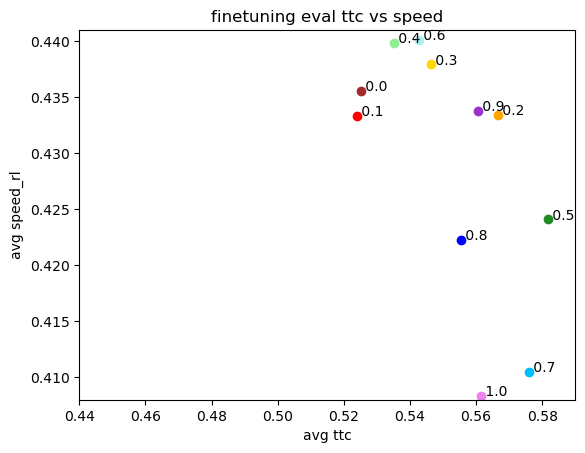

In [58]:
for i in range(len(plot_points)):
    pt = plot_points[i]
    source_beta, opt_target_beta, ttc, speed = pt
    p = (ttc/7, speed/10)
    plt.plot(*p, marker='o', color=colors[i])
    plt.annotate(f' {source_beta}', p)

plt.axis([0.44, 0.59, 0.408, 0.441])
# ax = plt.gca()
# ax.set_ylim([0.4, 0.58])

plt.xlabel('avg ttc')
plt.ylabel('avg speed_rl')
plt.title('finetuning eval ttc vs speed')
plt.show()
    

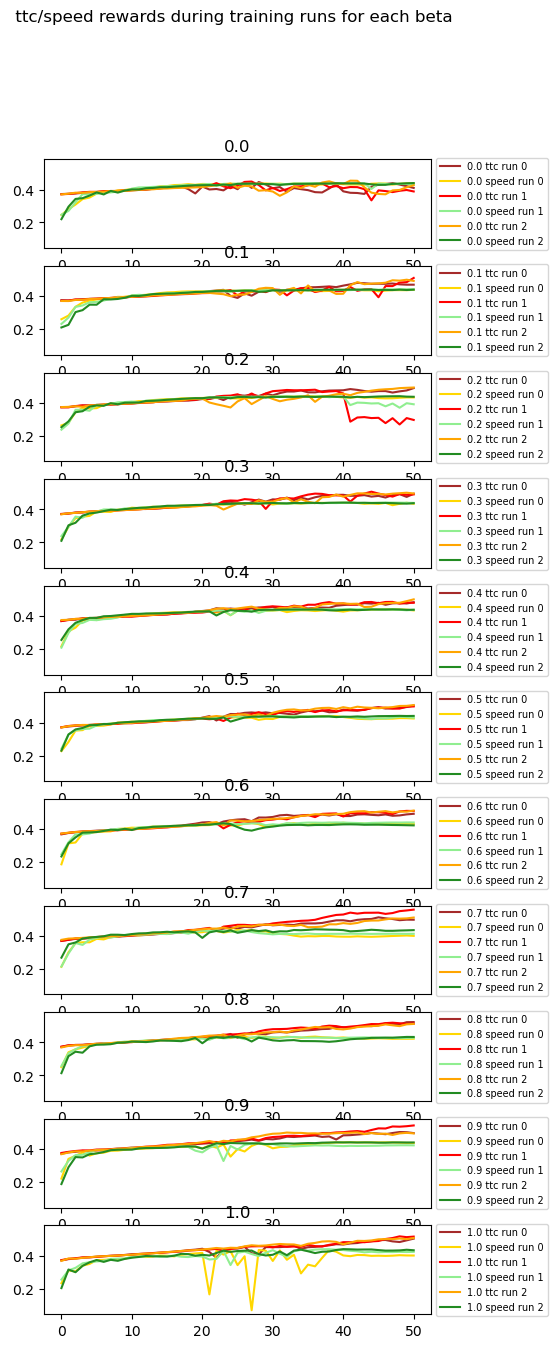

In [29]:
# plotting avg ttc & speed for each beta, to pick finetuning run

x = np.arange(51)
fig, axs = plt.subplots(11, figsize=(5, 15), sharey=True)

for b in range(11):
    beta = b/10
    if not beta in files.keys():
        continue
    ttc_ys, speed_ys, ttc_es, speed_es = speed_ttc_training_lists(files[beta])
    
    ax = plt.subplot(11, 1, b+1)
    ax.set_title(f'{beta}')
    
    for i in range(3):
        ax.plot(x, ttc_ys[i]/7, color=colors[i], label=f'{beta} ttc run {i}')
        ax.plot(x, speed_ys[i][:51]/10, color=colors[i+3], label=f'{beta} speed run {i}')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=7)
    
plt.suptitle(' ttc/speed rewards during training runs for each beta')

plt.show()
    
    

In [24]:
# evals setup
import os
import shutil

for i in range(11):
    b = i/10
    print(b)
    for j in range(3):
        tmp_dir = files[b][j][1]
        # try:
        #     os.mkdir(f'./tmp/{tmp_dir}/evaluations')
        #     os.mkdir(f'./tmp/{tmp_dir}/trajectories')
        # except:
        #     print(f'./tmp/{tmp_dir}/evaluations', f'./tmp/{tmp_dir}/trajectories', 'dir already exists')
        new_file_path = f'./tmp/{tmp_dir}/eval_commands.sh'
        # shutil.copy('./eval_commands.sh', new_file_path)
        os.system(f'cd ./tmp/{tmp_dir}/ && LLsub eval_commands.sh && cd ..')

0.0
Submitted batch job 25355579
LLGrid: TXE1 (running slurm-wlm 23.02.7)
Submitted batch job 25355580
LLGrid: TXE1 (running slurm-wlm 23.02.7)
Submitted batch job 25355581
LLGrid: TXE1 (running slurm-wlm 23.02.7)
0.1
Submitted batch job 25355582
LLGrid: TXE1 (running slurm-wlm 23.02.7)
Submitted batch job 25355583
LLGrid: TXE1 (running slurm-wlm 23.02.7)
Submitted batch job 25355584
LLGrid: TXE1 (running slurm-wlm 23.02.7)
0.2
Submitted batch job 25355585
LLGrid: TXE1 (running slurm-wlm 23.02.7)
Submitted batch job 25355586
LLGrid: TXE1 (running slurm-wlm 23.02.7)
Submitted batch job 25355587
LLGrid: TXE1 (running slurm-wlm 23.02.7)
0.3
Submitted batch job 25355588
LLGrid: TXE1 (running slurm-wlm 23.02.7)
Submitted batch job 25355589
LLGrid: TXE1 (running slurm-wlm 23.02.7)
Submitted batch job 25355590
LLGrid: TXE1 (running slurm-wlm 23.02.7)
0.4
Submitted batch job 25355591
LLGrid: TXE1 (running slurm-wlm 23.02.7)
Submitted batch job 25355592
LLGrid: TXE1 (running slurm-wlm 23.02.7)


In [52]:
# do evals
# plot pareto graph

evals = {
      0 : [25355579, 25355580, 25355581],
    0.1 : [25355582, 25355583, 25355584],
    0.2 : [25355585, 25355586, 25355587], 
    0.3 : [25355588, 25355589, 25355590],
    0.4 : [25355591, 25355592, 25355593],
    0.5 : [25355594, 25355595, 25355596],
    0.6 : [25355597, 25355598, 25355599], 
    0.7 : [25355600, 25355601, 25355602],
    0.8 : [25355603, 25355604, 25355605],
    0.9 : [25355606, 25355607, 25355608],
    1   : [25355609, 25355610, 25355611], 
}


def ttc_eval_rewards(beta, j):
    log = f'tmp/{files[beta][j][1]}/output-{evals[beta][j]}.log'
    ttc_y, ttc_e = ttc_mean_std(log)
    avg_ttc_y = np.mean(np.array(ttc_y))
    
    return avg_ttc_y/7

def speed_eval_rewards(beta, j):
    speed_csv = pd.read_csv(f'./tmp/{files[beta][j][1]}/evaluations/test.csv')
    return np.mean(speed_csv['speed_rl'])/10

for i in range(11):
    beta = i/10
    if beta not in evals:
        continue
    ttcs, speeds = [], []
    for j in range(3):
        ttcs += [ttc_eval_rewards(beta, j)]
        speeds += [speed_eval_rewards(beta, j)]
    p = (np.mean(ttcs), np.mean(speeds))
    plt.plot(*p, marker='o', color=colors[i])
    plt.annotate(f'  {beta}', p)

plt.xlabel('avg ttc')
plt.ylabel('avg speed_rl')
plt.title('eval ttc vs speed')
plt.show()

TypeError: cannot unpack non-iterable numpy.float64 object

In [53]:
# all log ttc divided by 7 here, warmup0

betas = {
      0 : [(25304848, 'clhrkaix')],
    0.1 : [(25304854, 'jdtadvlj')],
    0.2 : [(25304855, 'jeichopr')],
    0.3 : [(25304860, 'tjgsbnep')],
    0.4 : [(25305812, 'fndbtywr')],
    0.5 : [(25304877, 'cffsfbxs')],
    0.6 : [(25305820, 'ymzrcdoq')],
    0.7 : [(25305829, 'rbgdmava')],
    0.8 : [(25305830, 'vmjkxwke')],
    0.9 : [(25305817, 'fpjocvxj')],
    1   : [(25304883, 'vtiqphnd'), (25305798, 'equykqac')],
}
### 0.75: 25304880 





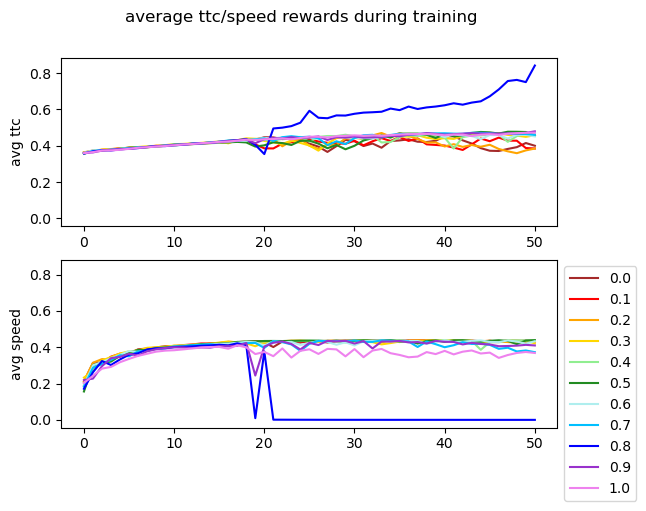

In [42]:
x = np.arange(51)
colors=['brown', 'red', 'orange', 'gold', 'lightgreen', 'forestgreen', 'paleturquoise', 'deepskyblue', 'blue', 'darkorchid', 'violet']

fig, axs = plt.subplots(2, sharey=True)

for b in range(11):
    beta = b/10
    if not beta in betas.keys():
        continue
    avg_ttc_y, avg_speed_y, avg_ttc_e, avg_speed_e = speed_ttc_training_rewards(betas[beta])
    
    axs[0].plot(x, avg_ttc_y/7, color=colors[b], label=f'{beta} ttc')
    axs[1].plot(x, avg_speed_y/10, color=colors[b], label=f'{beta}')
    
axs[0].set_ylabel('avg ttc')
axs[1].set_ylabel('avg speed')
plt.suptitle('average ttc/speed rewards during training')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [43]:
# evals setup
import os
import shutil

for i in range(11):
    b = i/10
    os.mkdir(f'./automatic_vehicular_control/tmp/{betas[b][0][1]}/evaluations')
    os.mkdir(f'./automatic_vehicular_control/tmp/{betas[b][0][1]}/trajectories')
    shutil.copy('automatic_vehicular_control/eval_commands.sh', f'./automatic_vehicular_control/tmp/{betas[b][0][1]}/eval_commands.sh')
    
    

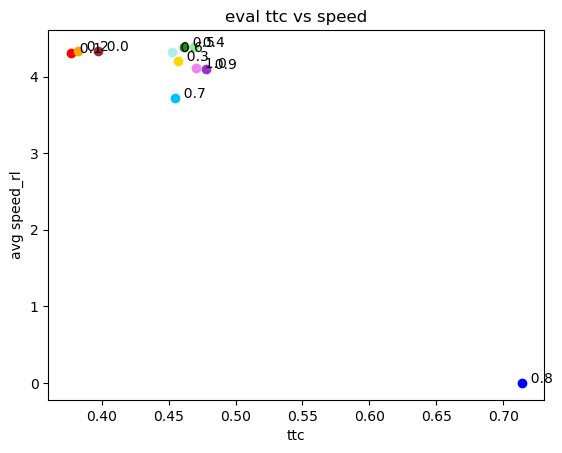

In [13]:
# do evals
# plot pareto graph

evals = {
      0 : 25307101,
    0.1 : 25307105,
    0.2 : 25307108, 
    0.3 : 25307109,
    0.4 : 25307110,
    0.5 : 25307114,
    0.6 : 25307118, 
    0.7 : 25307120,
    0.8 : 25307123,
    0.9 : 25307125,
    1   : 25307127, #vtiqphnd
}


def ttc_eval_rewards(beta):
    log = f'tmp/{betas[beta][0][1]}/output-{evals[beta]}.log'
    ttc_y, ttc_e = ttc_mean_std(log)
    avg_ttc_y = np.mean(np.array(ttc_y))
    
    return avg_ttc_y/7

def speed_eval_rewards(beta):
    speed_csv = pd.read_csv(f'./automatic_vehicular_control/tmp/{betas[beta][0][1]}/evaluations/test.csv')
    return np.mean(speed_csv['speed_rl'])

for i in range(11):
    beta = i/10
    if beta not in evals:
        continue
    p = (ttc_eval_rewards(beta), speed_eval_rewards(beta))
    plt.plot(*p, marker='o', color=colors[i])
    plt.annotate(f'  {beta}', p)

plt.xlabel('ttc')
plt.ylabel('avg speed_rl')
plt.title('eval ttc vs speed')
plt.show()

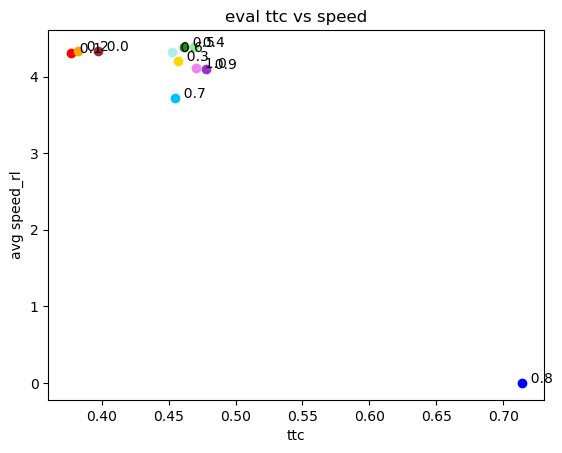

In [13]:
# do evals
# plot pareto graph

evals = {
      0 : 25307101,
    0.1 : 25307105,
    0.2 : 25307108, 
    0.3 : 25307109,
    0.4 : 25307110,
    0.5 : 25307114,
    0.6 : 25307118, 
    0.7 : 25307120,
    0.8 : 25307123,
    0.9 : 25307125,
    1   : 25307127, #vtiqphnd
}


def ttc_eval_rewards(beta):
    log = f'tmp/{betas[beta][0][1]}/output-{evals[beta]}.log'
    ttc_y, ttc_e = ttc_mean_std(log)
    avg_ttc_y = np.mean(np.array(ttc_y))
    
    return avg_ttc_y/7

def speed_eval_rewards(beta):
    speed_csv = pd.read_csv(f'./automatic_vehicular_control/tmp/{betas[beta][0][1]}/evaluations/test.csv')
    return np.mean(speed_csv['speed_rl'])

for i in range(11):
    beta = i/10
    if beta not in evals:
        continue
    p = (ttc_eval_rewards(beta), speed_eval_rewards(beta))
    plt.plot(*p, marker='o', color=colors[i])
    plt.annotate(f'  {beta}', p)

plt.xlabel('ttc')
plt.ylabel('avg speed_rl')
plt.title('eval ttc vs speed')
plt.show()

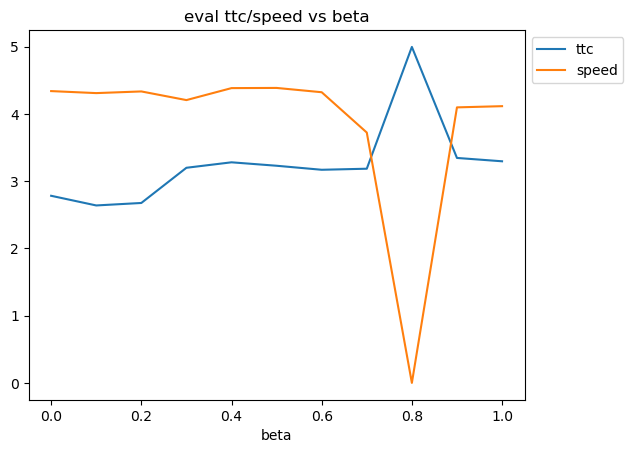

In [17]:
ttc_per_beta, speed_per_beta = [], []

for i in range(11):
    beta = i/10
    if beta not in evals:
        continue
    ttc_per_beta += [ttc_eval_rewards(beta)]
    speed_per_beta += [speed_eval_rewards(beta)]

x_beta = np.arange(0, 1.1, 0.1)

plt.plot(x_beta, [7*x for x in ttc_per_beta], label='ttc')
plt.plot(x_beta, speed_per_beta, label='speed')
plt.xlabel('beta')
plt.title('eval ttc/speed vs beta')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


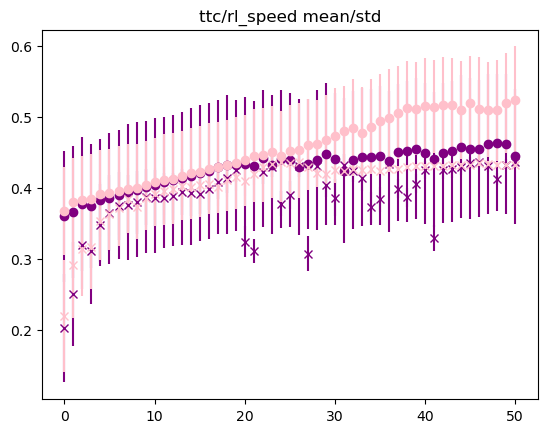

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# ttc normalized by log & divide by 7
# forced beta=1 (removed speed term altogether)
beta1 = ('output-25303821.log', 'fcefmxhi')

# warmup=0
warm0 = ('output-25303816.log', 'biggzosk')

warm0_ttc_y, warm0_ttc_e = ttc_mean_std(warm0[0])  
warm0_speed_y, warm0_speed_e = rl_speed_mean_std(warm0[1])

plt.errorbar(x, warm0_ttc_y/7, warm0_ttc_e/7, linestyle='None', marker='o', color='purple')
plt.errorbar(x, warm0_speed_y/10, warm0_speed_e/10, linestyle='None', marker='x', color='purple')

beta1_ttc_y, beta1_ttc_e = ttc_mean_std(beta1[0])  
beta1_speed_y, beta1_speed_e = rl_speed_mean_std(beta1[1])

plt.errorbar(x, beta1_ttc_y/7, beta1_ttc_e/7, linestyle='None', marker='o', color='pink')
plt.errorbar(x, beta1_speed_y/10, beta1_speed_e/10, linestyle='None', marker='x', color='pink')

plt.title('ttc/rl_speed mean/std')
plt.show()

# purple = warm0 + 0.99 beta, pink = forced beta=1
# both log ttc divided by 7 

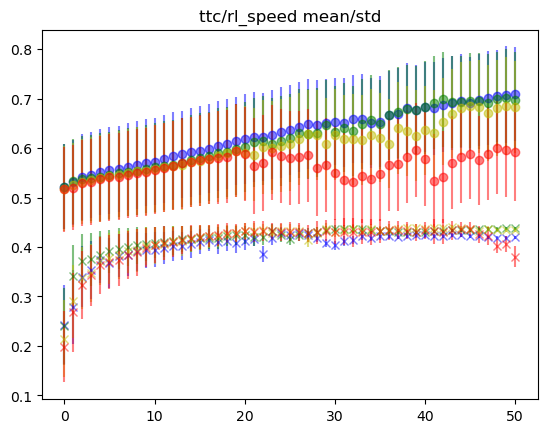

In [7]:


# ttc not normalized
# beta0_99 = [('output-25251701.log', 'ducpjziz'), ('output-25251741.log', 'olryuhzv'), ('output-25251863.log', 'ienhiwkw') ]
# beta0_5 = [('output-25251946.log', 'mokjwfji'), ('output-25252053.log', 'hlnirfmk'), ('output-25252378.log', 'ntqlfiax') ]
# beta0 = [('output-25252057.log', 'rrujtrbj'), ('output-25252060.log', 'abehpgzr'), ('output-25252062.log', 'utoglpry') ]

beta0_99 = [('output-25271423.log', 'wptrxqsa'), ('output-25272241.log', 'altayldz'), ('output-25272242.log', 'foqkqtse')]
beta0_5 = [('output-25272243.log', 'puodlafo'), ('output-25272244.log', 'lvmdqrox'), ('output-25272245.log', 'alftbqzb')]
# beta0 = [('output-25272266.log', 'akzmkdvg'), ('output-25272267.log', 'chtobqtl'), ('output-25272268.log', 'lwserxan')]

# 0.2 25276290 ,1, 2
# check avg velocity for beta0, 0.99
# measure frequency of if/else for each 0, 10, ...50 model 0.99 path
beta0_2 = [('output-25276291.log', 'wflxbspf'), ('output-25276290.log', 'naygygre')]
# 0.2 value printing a lot ?? ('output-25276292.log', ''),

# rerunning 
beta0=[('output-25274851.log', 'vdqzgkat'), ('output-25274852.log', 'rpnfcvlt'), ('output-25274853.log', 'ctsiovro')]

# need to plot for each beta:
#  ttcmean+std for each run
#  speed mean/std for each run

beta_nums = [0.99, 0.5, 0.2, 0]
beta_runs = [beta0_99, beta0_5,beta0_2, beta0]

x = np.arange(51)
    
for j in range(len(beta_runs)):
    b = beta_runs[j]
    colors=['b', 'g', 'y', 'r']

    avg_ttc_y, avg_ttc_e = [], []
    avg_speed_y, avg_speed_e = [], []
    for i in range(len(b)):
        run = b[i]
        ttc_y, ttc_e = ttc_mean_std(run[0])
        avg_ttc_y += [ttc_y]
        avg_ttc_e += [ttc_e]
        
        speed_y, speed_e = rl_speed_mean_std(run[1])
        avg_speed_y += [speed_y]
        avg_speed_e += [speed_e]
    
    avg_ttc_y = np.mean(np.stack(avg_ttc_y), axis=0)
    avg_ttc_e = np.mean(np.stack(avg_ttc_e), axis=0)
    avg_speed_y = np.mean(np.stack(avg_speed_y), axis=0)
    avg_speed_e = np.mean(np.stack(avg_speed_e), axis=0)
    
    plt.errorbar(x, avg_ttc_y/5, avg_ttc_e/5, linestyle='None', marker='o', color=colors[j], alpha=0.5)
    # ttc_line.set_label(f'{j} ttc')
    plt.errorbar(x, avg_speed_y/10, avg_speed_e/10, linestyle='None', marker='x', color=colors[j], alpha=0.5)
    # speed_line.set_label(f'{j} speed')
    

    
plt.title('ttc/rl_speed mean/std')
# plt.legend()
plt.show()

# r = 0, y = 0.2, g = 0.5, b = 0.99
#reward = (1-beta)*reward/max_speed + beta*ttc/5


In [15]:
# measure frequency of if/else for each 0, 10, ...50 model 0.99 path in wptrxqsa
# check number of ttc violations, maybe 0.5 ~= 0.99
def ifs_else_freq(log_number, tmp_dir):
    path=f'./automatic_vehicular_control/tmp/{tmp_dir}/output-{log_number}.log'
    ifs, elses = 0, 0
    with open(path) as f:
        for line in f:
            if line[:5] == 'if184':
                ifs += 1
            elif line[:5] == 'else1':
                elses += 1
    return ifs, elses


def count_ifs_elses(logs, tmp_dir):
    ifs = []
    elses = []
    for i in range(6):
        step = (i+1)*10
        if_num, else_num = ifs_else_freq(logs[i], tmp_dir)
        ifs += [if_num]
        elses += [else_num]
    return ifs, elses
    


In [16]:
# logs for 0, 10, 20, 30, 40, 50
logs0_99 = [25277007, 25276934, 25277010, 25277013, 25277014, 25277015]
tmp_dir0_99 = 'wptrxqsa'
ifs0_99, elses0_99 = count_ifs_elses(logs0_99, tmp_dir0_99)

In [17]:
logs0 = [25277706, 25277709, 25277712, 25277715, 25277721, 25277723]
tmp_dir0 = 'vdqzgkat'
ifs0, elses0 = count_ifs_elses(logs0, tmp_dir0)

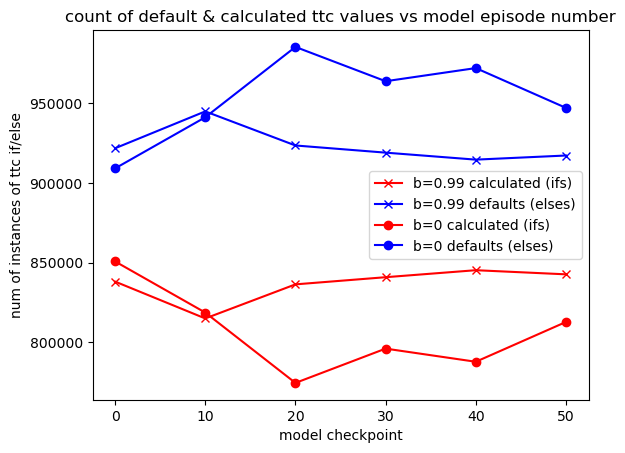

In [18]:
x = list(range(0, 60, 10))
plt.plot(x, ifs0_99, label='b=0.99 calculated (ifs)', color='r', marker='x')
plt.plot(x, elses0_99, label='b=0.99 defaults (elses)', color='b', marker='x')
plt.plot(x, ifs0, label='b=0 calculated (ifs)', color='r', marker='o')
plt.plot(x, elses0, label='b=0 defaults (elses)', color='b', marker='o')

plt.xlabel('model checkpoint')
plt.ylabel('num of instances of ttc if/else')
plt.title('count of default & calculated ttc values vs model episode number')
plt.legend()
plt.show()

In [22]:
# average speed of all vehicles over all testing steps. testing done on checkpt 50

print('avg speed of all vehicles over all steps during evaluation of ckpt 50')
speed0_99 = pd.read_csv(f'./automatic_vehicular_control/tmp/wptrxqsa/evaluations/test0.99.50.csv')
print(np.mean(speed0_99['speed_rl']), 'beta=0.99')

speed0 = pd.read_csv(f'./automatic_vehicular_control/tmp/vdqzgkat/evaluations/test0.50.csv')
print(np.mean(speed0['speed_rl']), 'beta=0')

avg speed of all vehicles over all steps during evaluation of ckpt 50
4.1907859716731535 beta=0.99
4.374412614412391 beta=0


In [ ]:
# new pareto plot with new normalization scheme

beta0_99 = [('output-25271423.log', 'wptrxqsa'), ('output-25272241.log', 'altayldz'), ('output-25272242.log', 'foqkqtse')]
beta0_5 = [('output-25272243.log', 'puodlafo'), ('output-25272244.log', 'lvmdqrox'), ('output-25272245.log', 'alftbqzb')]
beta0_2 = [('output-25276291.log', 'wflxbspf'), ('output-25276290.log', 'naygygre')]
beta0=[('output-25274851.log', 'vdqzgkat'), ('output-25274852.log', 'rpnfcvlt'), ('output-25274853.log', 'ctsiovro')]

b_lists = [beta0, beta0_2, beta0_5, beta0_99]
betas = [0, 0.2, 0.5, 0.99]

def avg_eval_speed(tmp_dir, beta):
    speed_col = pd.read_csv(f'./automatic_vehicular_control/tmp/{tmp_dir}/evaluations/test.csv')

for i in range(len()):
    b = b_lists[i]
    beta = betas[i]
    for _, tmp_dir in b:
        

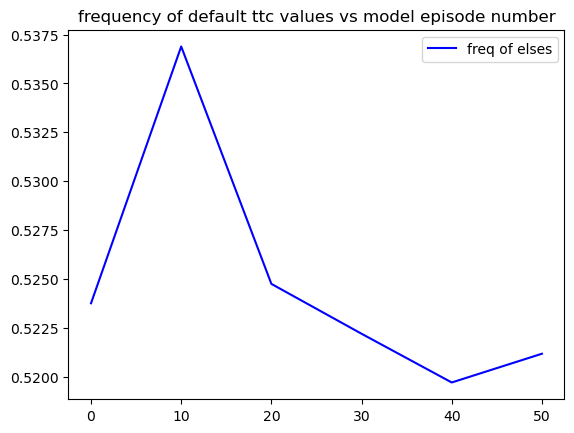

In [12]:
plt.plot(x, [elses[i]/(ifs[i]+elses[i]) for i in range(len(elses))], label='freq of elses', color='b')
plt.title('frequency of default ttc values vs model episode number')
plt.legend()
plt.show()

In [2]:
def ttc_stats(log_path):
    valid_ttc_count, valid_ttc_sum, invalid_ttc_count = 0, 0, 0
    with open(log_path) as f:
        for line in f:
            if line[:5] == 'ttc v':
                ttc = float(line.split(' ')[5])
                valid_ttc_count += 1
                valid_ttc_sum += ttc
            elif line[:5] == 'ttc i':
                invalid_ttc_count += 1
    return valid_ttc_count, valid_ttc_sum, invalid_ttc_count

In [6]:
valid_count, valid_sum, invalid = ttc_stats('./automatic_vehicular_control/tmp/stqbimeu/output-25061436.log')

In [8]:
print(valid_count, valid_sum, invalid)
print(valid_sum/valid_count)
# ttc stats from eval results of zee's code no ttc calls

817982 7.731667362975174e+17 942018
945212408460.721


In [8]:
valid_count, valid_sum, invalid = ttc_stats('./automatic_vehicular_control/tmp/esfsddjm/output-25171652.log')
print(valid_count, valid_sum, invalid)
print(valid_sum/valid_count)
#0

895746 8.620814660503013e+17 864254
962417321484.3285


In [4]:
# valid_count, valid_sum, invalid = ttc_stats('./automatic_vehicular_control/tmp/hpmtzunc/output-25074985.log') this is incorrect train reward scheme

valid_count, valid_sum, invalid = ttc_stats('./automatic_vehicular_control/tmp/ywuofqon/output-25167468.log')
print(valid_count, valid_sum, invalid)
print(valid_sum/valid_count)
#0.5

285495 7.626280947450886e+17 1474505
2671248514842.952


In [3]:
# valid_count, valid_sum, invalid = ttc_stats('./automatic_vehicular_control/tmp/lmseyrtr/output-25077766.log') this is incorrect train reward scheme

valid_count, valid_sum, invalid = ttc_stats('./automatic_vehicular_control/tmp/absgycun/output-25167317.log')
print(valid_count, valid_sum, invalid)
print(valid_sum/valid_count)
#0.99

628518 7.523810445905834e+17 1131482
1197071594752.391


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

speed_0 = pd.read_csv('./automatic_vehicular_control/tmp/esfsddjm/evaluations/test0.csv')
speed_0_5 = pd.read_csv('./automatic_vehicular_control/tmp/ywuofqon/evaluations/test0.5.csv')
speed_0_99 = pd.read_csv('./automatic_vehicular_control/tmp/absgycun/evaluations/test0.99.csv')

speed_0 = np.mean(speed_0['speed_rl'])
speed_0_5 = np.mean(speed_0_5['speed_rl'])
speed_0_99 = np.mean(speed_0_99['speed_rl'])
print(speed_0)
print(speed_0_5)
print(speed_0_99)

4.413121083629781
3.2212553396821026e-05
3.975957426722091


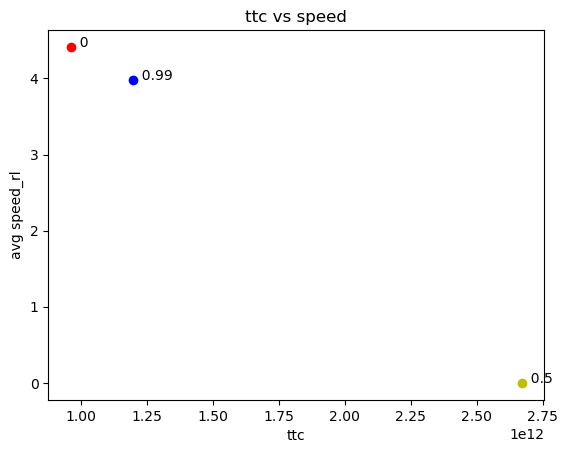

In [7]:
beta_zero = (962417321484.3285, speed_0)
beta_half = (2671248514842.952, speed_0_5)
beta_one = (1197071594752.391, speed_0_99)

plt.annotate('  0', beta_zero)
plt.annotate('  0.5', beta_half)
plt.annotate('  0.99', beta_one)

plt.plot(*beta_zero, 'ro')
plt.plot(*beta_half, 'yo')
plt.plot(*beta_one, 'bo')

plt.xlabel('ttc')
plt.ylabel('avg speed_rl')
plt.title('ttc vs speed')
plt.show()

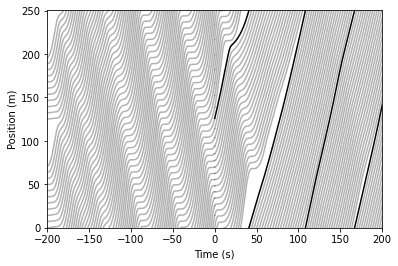

In [45]:
circ = 250
sim_step = 0.1
warmup_steps = 2000
label = 'Ours (DRL, Global)'

plt.figure(figsize=(6, 4))
path = traj_paths[label, circ]
xml = E.from_path(path.replace('.npz', '.net.xml'))
lanes = {e[0].id: Namespace(**e[0]) for e in xml if e._name == 'edge'}

df = cache[label, circ][0]
df.id = df.id.astype(int)
lane_order = [':bottom_0_0', 'right_0', ':top_0_0', 'left_0']
lane_lengths = [float(lanes[k].length) for k in lane_order]
total_length = sum(lane_lengths)
pos_offset = dict(zip(lane_order, np.cumsum(lane_lengths) - lane_lengths))
df['is_warmup'] = df.step < warmup_steps
for (id, is_warmup), vehs in df.groupby(['id', 'is_warmup']):
    position = vehs.apply(lambda row: pos_offset[row.lane_id] + row.lane_position, axis=1).values
    breaks = position[:-1] > position[1:]
    idxs, = breaks.nonzero()
    for steps, pos in zip(np.split(vehs.step, 1 + idxs), np.split(position, 1 + idxs)):
        plt.plot((steps - warmup_steps) * sim_step, pos, color='black', alpha=1 if id == 0 and not is_warmup else 0.3)
plt.ylabel('Position (m)')
plt.xlabel('Time (s)')
plt.xlim([-warmup_steps * sim_step, 200])
plt.ylim([0, total_length])
plt.show()

# Double Ring

# Figure Eight

# Highway Bottleneck

## IDM parameters

# Highway Ramp

# Intersection